In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#we're gonna create a website where the person enters the sepallength,width,etc, and he gets the species of the flower

In [5]:
#creating features
X = iris.drop('species', axis = 1)

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#label
y = iris['species']

In [9]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [10]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
#we're gonna do multiclass classification here, so we're gonna use sklearn library

In [12]:
from sklearn.preprocessing import LabelBinarizer

In [13]:
encoder = LabelBinarizer()

In [14]:
y = encoder.fit_transform(y)

In [15]:
y #now the labels are one hot encoded here

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 101)

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
scaled_X_train = scaler.transform(X_train)

In [24]:
scaled_X_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(4, activation = 'relu', input_shape = [4, ]))
model.add(Dense(3, activation= 'softmax')) #last layer should always be equal to the number of classes

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(patience = 10) #to see the curve flatten out a bit longer hence, patience is 10

In [30]:
model.fit(x = scaled_X_train, y = y_train, epochs = 300, validation_data = (scaled_X_test, y_test), callbacks = [early_stop])

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 1s 6ms/sample - loss: 1.1723 - accuracy: 0.3500 - val_loss: 1.1644 - val_accuracy: 0.3667
Epoch 2/300
120/120 [==============================] - 0s 166us/sample - loss: 1.1670 - accuracy: 0.3500 - val_loss: 1.1597 - val_accuracy: 0.3667
Epoch 3/300
120/120 [==============================] - 0s 183us/sample - loss: 1.1615 - accuracy: 0.3417 - val_loss: 1.1553 - val_accuracy: 0.3667
Epoch 4/300
120/120 [==============================] - 0s 208us/sample - loss: 1.1560 - accuracy: 0.3333 - val_loss: 1.1508 - val_accuracy: 0.3667
Epoch 5/300
120/120 [==============================] - 0s 175us/sample - loss: 1.1510 - accuracy: 0.3250 - val_loss: 1.1464 - val_accuracy: 0.3667
Epoch 6/300
120/120 [==============================] - 0s 191us/sample - loss: 1.1463 - accuracy: 0.3333 - val_loss: 1.1418 - val_accuracy: 0.3333
Epoch 7/300
120/120 [==============================] - 0s 216us/sample - lo

120/120 [==============================] - 0s 187us/sample - loss: 0.6883 - accuracy: 0.6833 - val_loss: 0.7390 - val_accuracy: 0.6000
Epoch 112/300
120/120 [==============================] - 0s 224us/sample - loss: 0.6850 - accuracy: 0.6833 - val_loss: 0.7358 - val_accuracy: 0.6000
Epoch 113/300
120/120 [==============================] - 0s 241us/sample - loss: 0.6814 - accuracy: 0.6833 - val_loss: 0.7327 - val_accuracy: 0.6000
Epoch 114/300
120/120 [==============================] - 0s 216us/sample - loss: 0.6781 - accuracy: 0.6833 - val_loss: 0.7297 - val_accuracy: 0.6000
Epoch 115/300
120/120 [==============================] - 0s 233us/sample - loss: 0.6748 - accuracy: 0.6833 - val_loss: 0.7265 - val_accuracy: 0.6000
Epoch 116/300
120/120 [==============================] - 0s 208us/sample - loss: 0.6715 - accuracy: 0.6833 - val_loss: 0.7234 - val_accuracy: 0.6000
Epoch 117/300
120/120 [==============================] - 0s 208us/sample - loss: 0.6682 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 208us/sample - loss: 0.5464 - accuracy: 0.6833 - val_loss: 0.6008 - val_accuracy: 0.6000
Epoch 167/300
120/120 [==============================] - 0s 233us/sample - loss: 0.5444 - accuracy: 0.6833 - val_loss: 0.5993 - val_accuracy: 0.6000
Epoch 168/300
120/120 [==============================] - 0s 216us/sample - loss: 0.5425 - accuracy: 0.6833 - val_loss: 0.5974 - val_accuracy: 0.6000
Epoch 169/300
120/120 [==============================] - 0s 233us/sample - loss: 0.5408 - accuracy: 0.6833 - val_loss: 0.5955 - val_accuracy: 0.6000
Epoch 170/300
120/120 [==============================] - 0s 241us/sample - loss: 0.5390 - accuracy: 0.6833 - val_loss: 0.5941 - val_accuracy: 0.6000
Epoch 171/300
120/120 [==============================] - 0s 224us/sample - loss: 0.5372 - accuracy: 0.6833 - val_loss: 0.5924 - val_accuracy: 0.6000
Epoch 172/300
120/120 [==============================] - 0s 234us/sample - loss: 0.5355 - accuracy: 0.6833 - val_loss: 0

120/120 [==============================] - 0s 175us/sample - loss: 0.4685 - accuracy: 0.7250 - val_loss: 0.5182 - val_accuracy: 0.6000
Epoch 222/300
120/120 [==============================] - 0s 175us/sample - loss: 0.4673 - accuracy: 0.7250 - val_loss: 0.5171 - val_accuracy: 0.6000
Epoch 223/300
120/120 [==============================] - 0s 175us/sample - loss: 0.4663 - accuracy: 0.7250 - val_loss: 0.5158 - val_accuracy: 0.6000
Epoch 224/300
120/120 [==============================] - 0s 191us/sample - loss: 0.4652 - accuracy: 0.7250 - val_loss: 0.5146 - val_accuracy: 0.6333
Epoch 225/300
120/120 [==============================] - 0s 191us/sample - loss: 0.4641 - accuracy: 0.7250 - val_loss: 0.5135 - val_accuracy: 0.6333
Epoch 226/300
120/120 [==============================] - 0s 208us/sample - loss: 0.4631 - accuracy: 0.7250 - val_loss: 0.5123 - val_accuracy: 0.6333
Epoch 227/300
120/120 [==============================] - 0s 191us/sample - loss: 0.4621 - accuracy: 0.7250 - val_loss: 0

120/120 [==============================] - 0s 199us/sample - loss: 0.4179 - accuracy: 0.8167 - val_loss: 0.4620 - val_accuracy: 0.8667
Epoch 277/300
120/120 [==============================] - 0s 191us/sample - loss: 0.4172 - accuracy: 0.8167 - val_loss: 0.4614 - val_accuracy: 0.8667
Epoch 278/300
120/120 [==============================] - 0s 175us/sample - loss: 0.4163 - accuracy: 0.8167 - val_loss: 0.4602 - val_accuracy: 0.8667
Epoch 279/300
120/120 [==============================] - 0s 183us/sample - loss: 0.4154 - accuracy: 0.8250 - val_loss: 0.4594 - val_accuracy: 0.8667
Epoch 280/300
120/120 [==============================] - 0s 208us/sample - loss: 0.4148 - accuracy: 0.8250 - val_loss: 0.4584 - val_accuracy: 0.8667
Epoch 281/300
120/120 [==============================] - 0s 199us/sample - loss: 0.4139 - accuracy: 0.8250 - val_loss: 0.4579 - val_accuracy: 0.8667
Epoch 282/300
120/120 [==============================] - 0s 199us/sample - loss: 0.4131 - accuracy: 0.8250 - val_loss: 0

In [31]:
metrics = pd.DataFrame(model.history.history)

In [32]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.172260,0.350000,1.164368,0.366667
1,1.167038,0.350000,1.159729,0.366667
2,1.161478,0.341667,1.155266,0.366667
3,1.156001,0.333333,1.150835,0.366667
4,1.151039,0.325000,1.146372,0.366667
...,...,...,...,...
295,0.402327,0.833333,0.445424,0.866667
296,0.401659,0.833333,0.444444,0.866667
297,0.400832,0.833333,0.443686,0.866667
298,0.400174,0.833333,0.442674,0.900000


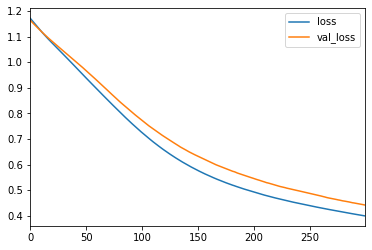

In [33]:
metrics[['loss', 'val_loss']].plot()

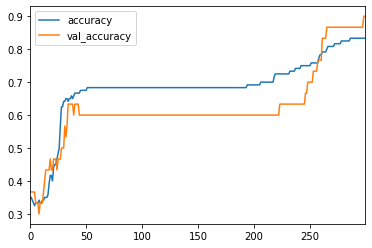

In [34]:
metrics[['accuracy', 'val_accuracy']].plot()

In [35]:
model.evaluate(scaled_X_test, y_test, verbose = 0)

[0.4418804943561554, 0.9]

In [36]:
#44% loss and 90% accuracy on the test set

In [37]:
#for deployment we are gonna train on all the data, the full dataset as the test set has 90% accuracy which is pretty good

In [38]:
epochs = len(metrics)

In [40]:
epochs

300

In [41]:
sclaed_X = scaler.fit_transform(X)

In [42]:
model = Sequential()
model.add(Dense(4, activation = 'relu', input_shape = [4, ]))
model.add(Dense(3, activation= 'softmax')) #last layer should always be equal to the number of classes

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [44]:
model.fit(sclaed_X, y, epochs = epochs)

Train on 150 samples
Epoch 1/300
150/150 [==============================] - 0s 3ms/sample - loss: 1.0780 - accuracy: 0.3333
Epoch 2/300
150/150 [==============================] - 0s 66us/sample - loss: 1.0696 - accuracy: 0.3333
Epoch 3/300
150/150 [==============================] - 0s 73us/sample - loss: 1.0625 - accuracy: 0.3333
Epoch 4/300
150/150 [==============================] - 0s 86us/sample - loss: 1.0543 - accuracy: 0.3333
Epoch 5/300
150/150 [==============================] - 0s 80us/sample - loss: 1.0480 - accuracy: 0.3333
Epoch 6/300
150/150 [==============================] - 0s 73us/sample - loss: 1.0422 - accuracy: 0.3333
Epoch 7/300
150/150 [==============================] - 0s 80us/sample - loss: 1.0359 - accuracy: 0.3333
Epoch 8/300
150/150 [==============================] - 0s 66us/sample - loss: 1.0307 - accuracy: 0.3333
Epoch 9/300
150/150 [==============================] - 0s 86us/sample - loss: 1.0252 - accuracy: 0.3333
Epoch 10/300
150/150 [======================

150/150 [==============================] - 0s 86us/sample - loss: 0.6356 - accuracy: 0.7267
Epoch 154/300
150/150 [==============================] - 0s 93us/sample - loss: 0.6340 - accuracy: 0.7267
Epoch 155/300
150/150 [==============================] - 0s 113us/sample - loss: 0.6325 - accuracy: 0.7267
Epoch 156/300
150/150 [==============================] - 0s 100us/sample - loss: 0.6309 - accuracy: 0.7267
Epoch 157/300
150/150 [==============================] - 0s 100us/sample - loss: 0.6294 - accuracy: 0.7333
Epoch 158/300
150/150 [==============================] - 0s 106us/sample - loss: 0.6280 - accuracy: 0.7333
Epoch 159/300
150/150 [==============================] - 0s 93us/sample - loss: 0.6264 - accuracy: 0.7333
Epoch 160/300
150/150 [==============================] - 0s 106us/sample - loss: 0.6249 - accuracy: 0.7333
Epoch 161/300
150/150 [==============================] - 0s 93us/sample - loss: 0.6235 - accuracy: 0.7333
Epoch 162/300
150/150 [==============================] 

In [45]:
#saving model

In [46]:
model.save('iris_model.h5')

In [47]:
#save the scaler....new data needs to be scaled in the way model expects it

In [48]:
import joblib

In [49]:
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [50]:
#predicting on a new single flower

In [51]:
from tensorflow.keras.models import load_model

In [52]:
flower_model = load_model('final_iris_model.h5')

In [53]:
flower_scaler = joblib.load('iris_scaler.pkl')

In [55]:
#we'll need our input in json format to predict with an API

In [56]:
iris.head(1)
#taking one of the datapoints to show how it'll work

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [57]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [58]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [59]:
encoder.classes_ #one hot encoded classes (setosa at index 0 , versi at 1 and virginica at 2)(actual index locations)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]] #assigning an array because that's how the model expects it
    
    flower = scaler.transform(flower) #scaling the flower
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)[0] #we get the actual class index, instead of array holding the class index
    
    return classes[class_ind] #returns the class at the class_ind
                    

In [61]:
return_prediction(flower_model,flower_scaler,flower_example)

'setosa'

# Code for Deployment

In [ ]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]